In [1]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Creating Reference Table

In [2]:
# create mae reference

df = pd.read_csv("data_part_clean4.csv")
df_full = df[["INCIDENT_DATETIME", "ZIPCODE", "NEIGHBORHOOD"]]

df_full["BOROUGH"] = "Manhattan"

In [3]:
# VARIABLES
neighborhood_or_zipcode = ["BOROUGH", "NEIGHBORHOOD", "ZIPCODE"]
delta_aggregs = [1,4,12] # number of hours for aggregations  
delta_weeks = [1,2,3,4] # number of weeks for lags
delta_years = [0,1,2] # number of years for weekly lags
forecasting_horizon = 1 # forecasting horizon
roll_split = 4 # divider for train and test set
hours_year= 8736


shift_delta_list = [24, 6, 2]


# creating variables for shifts
count_lag_columns = []
neig_lag_columns = []
zip_lag_columns = []
bor_lag_columns = []
for element in shift_delta_list:
    count_lag_columns.append("COUNT_LAG_"+str(element))
    neig_lag_columns.append("NEIG_LAG_"+str(element))
    zip_lag_columns.append("ZIP_LAG_"+str(element))
    bor_lag_columns.append("BOR_LAG_"+str(element))

 # creating tables for NEIGHBORHOOD and ZIPCODE and saving them in df_list
df_list = {}
for neig_zip in neighborhood_or_zipcode:
    for aggregation_size in delta_aggregs:
        print("working on creating",neig_zip, str(aggregation_size)+"H")
        df = df_full[["INCIDENT_DATETIME", neig_zip]]
        df["COUNT"] = pd.Series([1 for x in range(len(df.index))])

        df['INCIDENT_DATETIME'] = pd.to_datetime(df.INCIDENT_DATETIME)

        df['INCIDENT_DATETIME'] = df.INCIDENT_DATETIME.dt.floor(str(aggregation_size)+"H")
        df = df.groupby([neig_zip, 'INCIDENT_DATETIME']).COUNT.count().reset_index()
        time = pd.date_range(df.INCIDENT_DATETIME.min(), df.INCIDENT_DATETIME.max(), freq=str(aggregation_size)+"H")

        full = []
        for neigh in df[neig_zip].unique():
            full.append(pd.DataFrame({
                'INCIDENT_DATETIME': time, neig_zip: [neigh]*len(time)
        }))
        full = pd.concat(full).reset_index(drop=True)

        full = full.merge(df, on=[neig_zip, 'INCIDENT_DATETIME'], how='left')
        full = full.fillna(0)
        full.COUNT = full.COUNT.astype("int32")
        
        name = "df_"+str(neig_zip)+"_"+str(aggregation_size)+"H"
        df_list[name] = full
print("done")

#adding lag
for element in list(df_list.keys()):
    if "NEIGHBORHOOD" in element:
        print("working on lag for",element)
        # add lag
        for count_lag, neig_lag, shift_delta in zip(count_lag_columns, neig_lag_columns, shift_delta_list):
            df_list[element][neig_lag] = df_list[element]["NEIGHBORHOOD"].shift(shift_delta)
            df_list[element][count_lag] = df_list[element]["COUNT"].shift(shift_delta)

        # Lag Bleeding Correction
        for count_lag, neig_lag in zip(count_lag_columns, neig_lag_columns):
            df_list[element][count_lag] = np.where(df_list[element]["NEIGHBORHOOD"] != df_list[element][neig_lag], np.nan, df_list[element][count_lag])
            df_list[element][neig_lag] = np.where(df_list[element]["NEIGHBORHOOD"] != df_list[element][neig_lag], np.nan, df_list[element][neig_lag])

    elif "ZIPCODE" in element:
        print("working on lag for",element)
        # add lag
        for count_lag, zip_lag, shift_delta in zip(count_lag_columns, zip_lag_columns, shift_delta_list):
            df_list[element][zip_lag] = df_list[element]["ZIPCODE"].shift(shift_delta)
            df_list[element][count_lag] = df_list[element]["COUNT"].shift(shift_delta)

        # Lag Bleeding Correction
        for count_lag, zip_lag in zip(count_lag_columns, zip_lag_columns):
            df_list[element][count_lag] = np.where(df_list[element]["ZIPCODE"] != df_list[element][zip_lag], np.nan, df_list[element][count_lag])
            df_list[element][zip_lag] = np.where(df_list[element]["ZIPCODE"] != df_list[element][zip_lag], np.nan, df_list[element][zip_lag])

    elif "BOROUGH" in element:
        print("working on lag for",element)
        # add lag
        for count_lag, bor_lag, shift_delta in zip(count_lag_columns, bor_lag_columns, shift_delta_list):
            df_list[element][bor_lag] = df_list[element]["BOROUGH"].shift(shift_delta)
            df_list[element][count_lag] = df_list[element]["COUNT"].shift(shift_delta)

        # Lag Bleeding Correction
        for count_lag, bor_lag in zip(count_lag_columns, bor_lag_columns):
            df_list[element][count_lag] = np.where(df_list[element]["BOROUGH"] != df_list[element][bor_lag], np.nan, df_list[element][count_lag])
            df_list[element][bor_lag] = np.where(df_list[element]["BOROUGH"] != df_list[element][bor_lag], np.nan, df_list[element][bor_lag])
print("done")

working on creating BOROUGH 1H


/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["COUNT"] = pd.Series([1 for x in range(len(df.index))])
/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INCIDENT_DATETIME'] = pd.to_datetime(df.INCIDENT_DATETIME)
/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:35: SettingWithCopyWarning: 
A value is trying to be 

working on creating BOROUGH 4H


/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["COUNT"] = pd.Series([1 for x in range(len(df.index))])
/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INCIDENT_DATETIME'] = pd.to_datetime(df.INCIDENT_DATETIME)
/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:35: SettingWithCopyWarning: 
A value is trying to be 

working on creating BOROUGH 12H


/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["COUNT"] = pd.Series([1 for x in range(len(df.index))])
/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INCIDENT_DATETIME'] = pd.to_datetime(df.INCIDENT_DATETIME)
/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:35: SettingWithCopyWarning: 
A value is trying to be 

working on creating NEIGHBORHOOD 1H


/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["COUNT"] = pd.Series([1 for x in range(len(df.index))])
/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INCIDENT_DATETIME'] = pd.to_datetime(df.INCIDENT_DATETIME)
/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:35: SettingWithCopyWarning: 
A value is trying to be 

working on creating NEIGHBORHOOD 4H


/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["COUNT"] = pd.Series([1 for x in range(len(df.index))])
/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INCIDENT_DATETIME'] = pd.to_datetime(df.INCIDENT_DATETIME)
/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:35: SettingWithCopyWarning: 
A value is trying to be 

working on creating NEIGHBORHOOD 12H


/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["COUNT"] = pd.Series([1 for x in range(len(df.index))])
/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INCIDENT_DATETIME'] = pd.to_datetime(df.INCIDENT_DATETIME)
/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:35: SettingWithCopyWarning: 
A value is trying to be 

working on creating ZIPCODE 1H


/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["COUNT"] = pd.Series([1 for x in range(len(df.index))])
/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INCIDENT_DATETIME'] = pd.to_datetime(df.INCIDENT_DATETIME)
/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:35: SettingWithCopyWarning: 
A value is trying to be 

working on creating ZIPCODE 4H


/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["COUNT"] = pd.Series([1 for x in range(len(df.index))])
/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INCIDENT_DATETIME'] = pd.to_datetime(df.INCIDENT_DATETIME)
/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:35: SettingWithCopyWarning: 
A value is trying to be 

working on creating ZIPCODE 12H


/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["COUNT"] = pd.Series([1 for x in range(len(df.index))])
/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INCIDENT_DATETIME'] = pd.to_datetime(df.INCIDENT_DATETIME)
/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/4249270580.py:35: SettingWithCopyWarning: 
A value is trying to be 

done
working on lag for df_BOROUGH_1H
working on lag for df_BOROUGH_4H
working on lag for df_BOROUGH_12H
working on lag for df_NEIGHBORHOOD_1H
working on lag for df_NEIGHBORHOOD_4H
working on lag for df_NEIGHBORHOOD_12H
working on lag for df_ZIPCODE_1H
working on lag for df_ZIPCODE_4H
working on lag for df_ZIPCODE_12H
done


# Loading Results

In [4]:
# combining all results files

import os
import pandas as pd

# Create an empty list to store the dataframes
results_list = []

# Loop through all files in the current directory
for file in os.listdir():
    # Check if the file is a .csv file and starts with "results_"
    if file.endswith('.csv') and file.startswith('results_'):
        # Read the .csv file into a dataframe and append it to the list
        results_list.append(pd.read_csv(file))

# Concatenate all dataframes in the list into a single dataframe
df = pd.concat(results_list)

# Remove the columns with the name "Unnamed: 0" and "index"
df = df.drop(df.columns[[0]], axis=1)
df["Group_Element"] = df["Group_Element"].astype(str)

results = df
results["Model_Name"] = results["Model"]+results["Repeater"].str.replace('none', '')
results = results.drop(["Model", "Repeater"], axis=1)
results

,NH/ZIP,Grouper,Group_Element,y_real,y_predict,Datetime,Duration,Model_Name
0,df_ZIPCODE_12H,ZIPCODE,10007,3.0,4.000000,2018-06-25 00:00:00,4.462934,MLPClassifier()no_population
1,df_ZIPCODE_12H,ZIPCODE,10007,5.0,4.000000,2018-06-25 12:00:00,4.234416,MLPClassifier()no_population
2,df_ZIPCODE_12H,ZIPCODE,10007,2.0,6.000000,2018-06-26 00:00:00,4.352808,MLPClassifier()no_population
3,df_ZIPCODE_12H,ZIPCODE,10007,5.0,6.000000,2018-06-26 12:00:00,4.461404,MLPClassifier()no_population
4,df_ZIPCODE_12H,ZIPCODE,10007,5.0,6.000000,2018-06-27 00:00:00,4.740566,MLPClassifier()no_population
...,...,...,...,...,...,...,...,...
43,df_ZIPCODE_12H,ZIPCODE,10017,22.0,13.666667,2018-06-25 12:00:00,0.003095,MEDIC
44,df_ZIPCODE_12H,ZIPCODE,10017,13.0,9.166667,2018-06-26 00:00:00,0.003025,MEDIC
45,df_ZIPCODE_12H,ZIPCODE,10017,18.0,13.250000,2018-06-26 12:00:00,0.003012,MEDIC
46,df_ZIPCODE_12H,ZIPCODE,10017,14.0,7.916667,2018-06-27 00:00:00,0.003150,MEDIC


In [5]:
# create reference table for MAE
df_list_mae = pd.DataFrame(columns = ["Group_Element", "MASE_REF", "NH/ZIP"])
for element in list(df_list.keys()):
    df_mae = df_list[element][df_list[element]["INCIDENT_DATETIME"]<"2018-06-25"].copy(deep=True)

    lag_determinator = 99
    if "1H" in element:
        lag_determinator = "COUNT_LAG_24"
    elif "4H" in element:
        lag_determinator = "COUNT_LAG_6"
    elif "12H" in element:
        lag_determinator = "COUNT_LAG_2"

    df_mae["MASE_REF"] = abs(df_mae["COUNT"]-df_mae[lag_determinator])
    if "NEIGHBORHOOD" in element:
        summary = df_mae.groupby(["NEIGHBORHOOD"], as_index=False)["MASE_REF"].mean()
    elif "ZIPCODE" in element:
        summary = df_mae.groupby(["ZIPCODE"], as_index=False)["MASE_REF"].mean()
    elif "BOROUGH" in element:
        summary = df_mae.groupby(["BOROUGH"], as_index=False)["MASE_REF"].mean()
    summary["NH/ZIP"] = str(element)
    summary.columns = ['Group_Element', 'MASE_REF', "NH/ZIP"]
    df_list_mae = pd.concat([df_list_mae, summary])
df_list_mae = df_list_mae.reset_index(drop=True)
df_list_mae["Group_Element"] = df_list_mae["Group_Element"].astype(str)

In [6]:
# combine error metrics to results
results = pd.merge(results, df_list_mae,  how='left', left_on=['NH/ZIP','Group_Element'], right_on = ['NH/ZIP','Group_Element'])

#calculate forecasting error
results["ERROR"] = results["y_predict"]-results["y_real"]

# Finding Individual Values

In [7]:
# zip_1H min 
results[results["y_predict"]==results[results["NH/ZIP"]=="df_ZIPCODE_1H"]["y_predict"].min()]

,NH/ZIP,Grouper,Group_Element,y_real,y_predict,Datetime,Duration,Model_Name,MASE_REF,ERROR
26429,df_ZIPCODE_1H,ZIPCODE,10006,0.0,-494.516711,2018-06-26 11:00:00,7.979623,ExponentialSmoothing(),0.203675,-494.516711


In [8]:
# zip_1H max
results[results["y_predict"]==results[results["NH/ZIP"]=="df_ZIPCODE_1H"]["y_predict"].max()]

,NH/ZIP,Grouper,Group_Element,y_real,y_predict,Datetime,Duration,Model_Name,MASE_REF,ERROR
30204,df_ZIPCODE_1H,ZIPCODE,10007,0.0,250.416007,2018-06-25 12:00:00,7.03567,ExponentialSmoothing(),0.628806,250.416007


In [9]:
custom_sort2 = {"NaiveSeasonal(K=2)":0, "NaiveSeasonal(K=6)":1, "NaiveSeasonal(K=24)":2, "MEDIC":3, "ExponentialSmoothing()":6, "StatsForecastAutoARIMA()":7, "linear_model.LinearRegression()no_population":4, "linear_model.LinearRegression()with_population":5, "MLPClassifier()no_population":8, "MLPClassifier()with_population":9} 


results_mase = results.groupby(["NH/ZIP", "Model_Name"]).apply(lambda x: (np.mean(np.abs(x["y_real"] - x["y_predict"])))/x["MASE_REF"].mean()).reset_index(name="MASE")
mase_plot = pd.pivot(results_mase, index=["NH/ZIP"], columns="Model_Name", values="MASE").transpose().reset_index()
mase_plot = pd.melt(mase_plot, id_vars="Model_Name", var_name="Aggregation", value_name="MASE").sort_values(by="Model_Name", key=lambda x: x.map(custom_sort2)).reset_index()

# MLPC highest values
print(mase_plot[mase_plot["Model_Name"]=="MLPClassifier()with_population"][mase_plot[mase_plot["Model_Name"]=="MLPClassifier()with_population"]["Aggregation"]=="df_BOROUGH_12H"])
print(mase_plot[mase_plot["Model_Name"]=="MLPClassifier()no_population"][mase_plot[mase_plot["Model_Name"]=="MLPClassifier()no_population"]["Aggregation"]=="df_BOROUGH_12H"])

print(mase_plot[mase_plot["Model_Name"]=="MLPClassifier()with_population"][mase_plot[mase_plot["Model_Name"]=="MLPClassifier()with_population"]["Aggregation"]=="df_NEIGHBORHOOD_12H"])
print(mase_plot[mase_plot["Model_Name"]=="MLPClassifier()no_population"][mase_plot[mase_plot["Model_Name"]=="MLPClassifier()no_population"]["Aggregation"]=="df_NEIGHBORHOOD_12H"])

print(mase_plot[mase_plot["Model_Name"]=="MLPClassifier()with_population"][mase_plot[mase_plot["Model_Name"]=="MLPClassifier()with_population"]["Aggregation"]=="df_ZIPCODE_1H"])
print(mase_plot[mase_plot["Model_Name"]=="MLPClassifier()no_population"][mase_plot[mase_plot["Model_Name"]=="MLPClassifier()no_population"]["Aggregation"]=="df_ZIPCODE_1H"])

    index                      Model_Name     Aggregation      MASE
87      3  MLPClassifier()with_population  df_BOROUGH_12H  3.695298
    index                    Model_Name     Aggregation      MASE
72      2  MLPClassifier()no_population  df_BOROUGH_12H  4.466804
    index                      Model_Name          Aggregation      MASE
86     33  MLPClassifier()with_population  df_NEIGHBORHOOD_12H  1.930803
    index                    Model_Name          Aggregation      MASE
76     32  MLPClassifier()no_population  df_NEIGHBORHOOD_12H  1.769459
    index                      Model_Name    Aggregation      MASE
81     73  MLPClassifier()with_population  df_ZIPCODE_1H  1.062623
    index                    Model_Name    Aggregation      MASE
78     72  MLPClassifier()no_population  df_ZIPCODE_1H  0.803853


In [10]:
# mean incidents in largest granularity
results[results["NH/ZIP"] == "df_BOROUGH_12H"][results[results["NH/ZIP"] == "df_BOROUGH_12H"]["Model_Name"]=="MEDIC"]["y_real"].mean()

537.1666666666666

# Total calculation time

In [11]:
results.Duration.sum()/60/60/24

6.049520277538233

# Figure 5

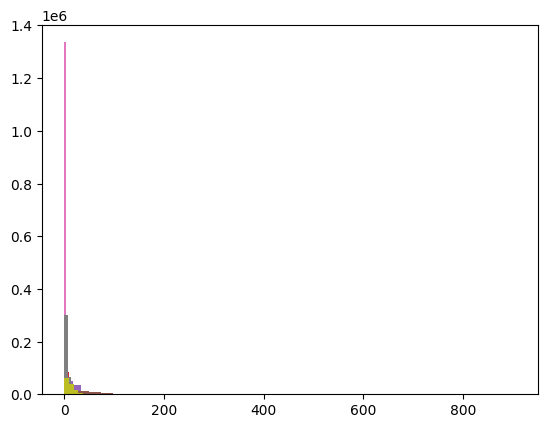

In [12]:
list_datasets = list(df_list.keys())
list_max = []
for element in list_datasets:
 list_max.append(max(plt.hist(df_list[element]["COUNT"])[0]))

 list_max

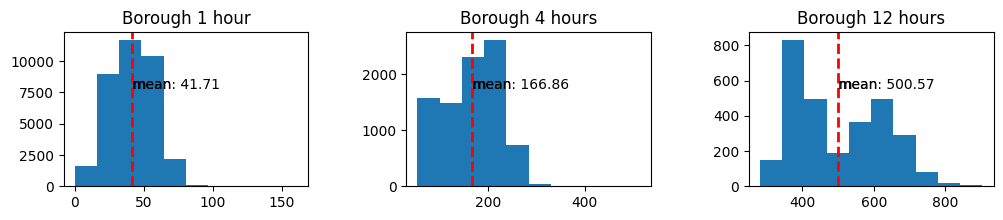

In [13]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax_list = [ax1, ax2, ax3]
max_list = [0,1,2]
names_list = ["Borough 1 hour", "Borough 4 hours", "Borough 12 hours"]
plt.subplots_adjust(hspace=0.4, wspace=0.4)
f.set_size_inches(12, 2)

for name, maxi, axis, element in zip(names_list, max_list, ax_list,list_datasets[:3]):
    mean = df_list[element]["COUNT"].mean()
    axis.hist(df_list[element]["COUNT"], color="#1f77b4")
    #axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    axis.axvline(mean, color='r', linestyle='dashed', linewidth=2)
    axis.annotate('mean', xy=(mean, list_max[maxi]/1.5))
    axis.annotate(f'mean: {mean:.2f}', xy=(mean, list_max[maxi]/1.5))
    axis.title.set_text(name)

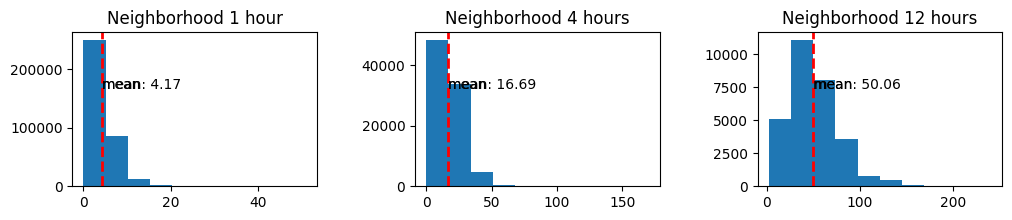

In [14]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax_list = [ax1, ax2, ax3]
max_list = [3,4,5]
names_list = ["Neighborhood 1 hour", "Neighborhood 4 hours", "Neighborhood 12 hours"]
plt.subplots_adjust(hspace=0.4, wspace=0.4)
f.set_size_inches(12, 2)

for name, maxi, axis, element in zip(names_list, max_list, ax_list,list_datasets[3:6]):
    mean = df_list[element]["COUNT"].mean()
    axis.hist(df_list[element]["COUNT"], color="#1f77b4")
    #axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    axis.axvline(mean, color='r', linestyle='dashed', linewidth=2)
    axis.annotate('mean', xy=(mean, list_max[maxi]/1.5))
    axis.annotate(f'mean: {mean:.2f}', xy=(mean, list_max[maxi]/1.5))
    axis.title.set_text(name)

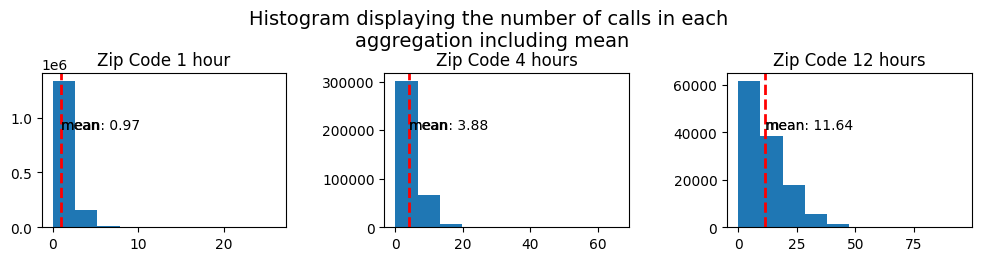

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax_list = [ax1, ax2, ax3]
max_list = [6,7,8]
names_list = ["Zip Code 1 hour", "Zip Code 4 hours", "Zip Code 12 hours"]
plt.subplots_adjust(hspace=0.4, wspace=0.4)
f.set_size_inches(12, 2)
f.suptitle("Histogram displaying the number of calls in each \naggregation including mean", y=1.2, fontsize=14)

for name, maxi, axis, element in zip(names_list, max_list, ax_list,list_datasets[6:9]):
    mean = df_list[element]["COUNT"].mean()
    axis.hist(df_list[element]["COUNT"], color="#1f77b4")
    #axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    axis.axvline(mean, color='r', linestyle='dashed', linewidth=2)
    axis.annotate('mean', xy=(mean, list_max[maxi]/1.5))
    axis.annotate(f'mean: {mean:.2f}', xy=(mean, list_max[maxi]/1.5))
    axis.title.set_text(name)

# Sorting References

In [16]:
custom_sort = {"df_BOROUGH_12H":0, "df_BOROUGH_4H":1, "df_BOROUGH_1H":2, "df_NEIGHBORHOOD_12H":3, "df_NEIGHBORHOOD_4H":4, "df_NEIGHBORHOOD_1H":5, "df_ZIPCODE_12H":6, "df_ZIPCODE_4H":7, "df_ZIPCODE_1H":8}
custom_sort2 = {"NaiveSeasonal(K=2)":0, "NaiveSeasonal(K=6)":1, "NaiveSeasonal(K=24)":2, "MEDIC":3, "ExponentialSmoothing()":4, "StatsForecastAutoARIMA()":5, "linear_model.LinearRegression()no_population":6, "linear_model.LinearRegression()with_population":7, "MLPClassifier()no_population":8, "MLPClassifier()with_population":9} 
custom_sort3 = {"df_BOROUGH_12H":0, "df_BOROUGH_4H":1, "df_BOROUGH_1H":2, "df_NEIGHBORHOOD_12H":3, "df_NEIGHBORHOOD_4H":4, "df_NEIGHBORHOOD_1H":5, "df_ZIPCODE_12H":6, "df_ZIPCODE_4H":7, "df_ZIPCODE_1H":8, "row_mean":9}
custom_sort4 = {"NaiveSeasonal(K=2)":0, "NaiveSeasonal(K=6)":1, "NaiveSeasonal(K=24)":2, "MEDIC":3, "ExponentialSmoothing()":4, "StatsForecastAutoARIMA()":5, "linear_model.LinearRegression()no_population":6, "linear_model.LinearRegression()with_population":7, "MLPClassifier()no_population":8, "MLPClassifier()with_population":9, "col_mean":10} 

# Bias Plot

In [17]:
results_bias = results.groupby(["NH/ZIP",  "Model_Name"])["ERROR"].mean().reset_index(name="Bias")
bias_plot = pd.pivot(results_bias, index=["NH/ZIP"], columns="Model_Name", values="Bias").transpose().reset_index()
bias_plot = pd.melt(bias_plot, id_vars="Model_Name", var_name="Aggregation", value_name="Bias").sort_values(by="Model_Name", key=lambda x: x.map(custom_sort2)).reset_index()
#bias_plot = bias_plot.sort_values(by="Model_Name", key=lambda x: x.map(custom_sort2)).reset_index()
#bias_plot = bias_plot.sort_values(by="Aggregation", key=lambda x: x.map(custom_sort)).reset_index()

#bias_plot

In [18]:
bias_plot = bias_plot[["Model_Name", "Aggregation", "Bias"]]
df_heatmap = bias_plot.pivot("Model_Name", "Aggregation", "Bias")
#df_heatmap

# statistics
df_heatmap["row_mean"] = df_heatmap.mean(axis = 1)
df_heatmap.loc["col_mean"] = df_heatmap.mean(axis = 0)

df_values = df_heatmap.copy()
df_values['row_mean'] = float('nan')
df_values.loc['col_mean'] = float('nan')

df_means = df_heatmap.copy()
df_means.loc[:-1, :-1] = float('nan')

df_values = df_values.sort_values(by=["Model_Name"], key=lambda x: x.map(custom_sort4))
df_values = df_values.reindex(columns=["df_BOROUGH_12H","df_BOROUGH_4H","df_BOROUGH_1H","df_NEIGHBORHOOD_12H","df_NEIGHBORHOOD_4H","df_NEIGHBORHOOD_1H","df_ZIPCODE_12H","df_ZIPCODE_4H","df_ZIPCODE_1H", "row_mean"])
df_means = df_means.sort_values(by=["Model_Name"], key=lambda x: x.map(custom_sort4))
df_means = df_means.reindex(columns=["df_BOROUGH_12H","df_BOROUGH_4H","df_BOROUGH_1H","df_NEIGHBORHOOD_12H","df_NEIGHBORHOOD_4H","df_NEIGHBORHOOD_1H","df_ZIPCODE_12H","df_ZIPCODE_4H","df_ZIPCODE_1H", "row_mean"])

#renaming
df_values.rename(columns={"df_BOROUGH_12H": "Borough 12 hours", 
                    "df_BOROUGH_4H": "Borough 4 hours", 
                    "df_BOROUGH_1H": "Borough 1 hour",
                    "df_NEIGHBORHOOD_12H": "Neighborhood 12 hours",
                    "df_NEIGHBORHOOD_4H": "Neighborhood 4 hours",
                    "df_NEIGHBORHOOD_1H": "Neighborhood 1 hour",
                    "df_ZIPCODE_12H": "Zip Code 12 hours",
                    "df_ZIPCODE_4H":"Zip Code 4 hours",
                    "df_ZIPCODE_1H":"Zip Code 1 hour",
                    "row_mean":"Row Mean"},
                    index={"NaiveSeasonal(K=2)":"Naive Seasonal (K=2)", 
                    "NaiveSeasonal(K=6)": "Naive Seasonal (K=6)", 
                    "NaiveSeasonal(K=24)":"Naive Seasonal (K=24)", 
                    "MEDIC": "MEDIC", 
                    "ExponentialSmoothing()":"Exponential Smoothing", 
                    "StatsForecastAutoARIMA()":"Auto ARIMA", 
                    "linear_model.LinearRegression()no_population":"Linear Regression WITHOUT population", 
                    "linear_model.LinearRegression()with_population":"Linear Regression WITH population", 
                    "MLPClassifier()no_population":"MLP Classifier WITHOUT population", 
                    "MLPClassifier()with_population":"MLP Classifier WITH population",
                    "col_mean":"Column Mean"},
                    inplace=True)
df_means.rename(columns={"df_BOROUGH_12H": "Borough 12 hours", 
                    "df_BOROUGH_4H": "Borough 4 hours", 
                    "df_BOROUGH_1H": "Borough 1 hour",
                    "df_NEIGHBORHOOD_12H": "Neighborhood 12 hours",
                    "df_NEIGHBORHOOD_4H": "Neighborhood 4 hours",
                    "df_NEIGHBORHOOD_1H": "Neighborhood 1 hour",
                    "df_ZIPCODE_12H": "Zip Code 12 hours",
                    "df_ZIPCODE_4H":"Zip Code 4 hours",
                    "df_ZIPCODE_1H":"Zip Code 1 hour",
                    "row_mean":"ROW MEAN"},
                    index={"NaiveSeasonal(K=2)":"Naive Seasonal (K=2)", 
                    "NaiveSeasonal(K=6)": "Naive Seasonal (K=6)", 
                    "NaiveSeasonal(K=24)":"Naive Seasonal (K=24)", 
                    "MEDIC": "MEDIC", 
                    "ExponentialSmoothing()":"Exponential Smoothing", 
                    "StatsForecastAutoARIMA()":"Auto ARIMA", 
                    "linear_model.LinearRegression()no_population":"Linear Regression WITHOUT population", 
                    "linear_model.LinearRegression()with_population":"Linear Regression WITH population", 
                    "MLPClassifier()no_population":"MLP Classifier WITHOUT population", 
                    "MLPClassifier()with_population":"MLP Classifier WITH population",
                    "col_mean":"COLUMN MEAN"},
                    inplace=True)


/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/3293635886.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_heatmap = bias_plot.pivot("Model_Name", "Aggregation", "Bias")
/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/3293635886.py:14: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df_means.loc[:-1, :-1] = float('nan')


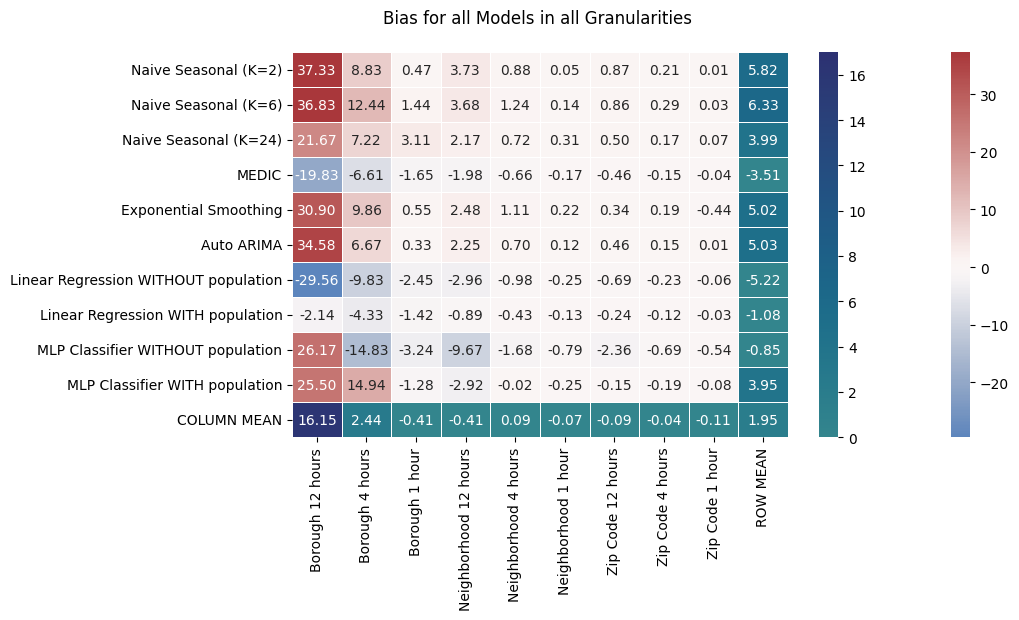

In [19]:
#df_heatmap

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(ax = ax,
                data = df_values,
                annot = True,
                fmt=".2f",
                linewidth=.5,
                cmap="vlag",
                center=0.00)
ax = sns.heatmap(ax = ax,
                data = df_means,
                annot = True,
                fmt=".2f",
                linewidth=.5,
                cmap="crest",
                center=0.00,
                vmin = 0, vmax = 17)
ax.set(xlabel="", ylabel="")
ax.set_title('Bias for all Models in all Granularities \n')
plt.show()

# Figure 14

In [20]:
results_bias = results.groupby(["NH/ZIP",  "Model_Name"])["ERROR"].mean().reset_index(name="Bias")
bias_plot = pd.pivot(results_bias, index=["NH/ZIP"], columns="Model_Name", values="Bias").transpose().reset_index()
bias_plot = pd.melt(bias_plot, id_vars="Model_Name", var_name="Aggregation", value_name="Bias").sort_values(by="Model_Name", key=lambda x: x.map(custom_sort2)).reset_index()

In [21]:
bias_scale_reference = pd.DataFrame(results.groupby("NH/ZIP")["y_real"].mean()).reset_index()

In [22]:
bias_scale_table = pd.merge(bias_plot, bias_scale_reference, left_on="Aggregation", right_on="NH/ZIP")
bias_scale_table["scaled_bias"] = bias_scale_table["Bias"]/bias_scale_table["y_real"]

In [23]:
temp_plot = bias_scale_table[["Model_Name", "Aggregation", "scaled_bias"]]
df_heatmap = temp_plot.pivot("Model_Name", "Aggregation", "scaled_bias")
#df_heatmap


# statistics
df_heatmap["row_mean"] = df_heatmap.mean(axis = 1)
df_heatmap.loc["col_mean"] = df_heatmap.mean(axis = 0)

df_values = df_heatmap.copy()
df_values['row_mean'] = float('nan')
df_values.loc['col_mean'] = float('nan')

df_means = df_heatmap.copy()
df_means.loc[:-1, :-1] = float('nan')

df_values = df_values.sort_values(by=["Model_Name"], key=lambda x: x.map(custom_sort4))
df_values = df_values.reindex(columns=["df_BOROUGH_12H","df_BOROUGH_4H","df_BOROUGH_1H","df_NEIGHBORHOOD_12H","df_NEIGHBORHOOD_4H","df_NEIGHBORHOOD_1H","df_ZIPCODE_12H","df_ZIPCODE_4H","df_ZIPCODE_1H", "row_mean"])
df_means = df_means.sort_values(by=["Model_Name"], key=lambda x: x.map(custom_sort4))
df_means = df_means.reindex(columns=["df_BOROUGH_12H","df_BOROUGH_4H","df_BOROUGH_1H","df_NEIGHBORHOOD_12H","df_NEIGHBORHOOD_4H","df_NEIGHBORHOOD_1H","df_ZIPCODE_12H","df_ZIPCODE_4H","df_ZIPCODE_1H", "row_mean"])

#renaming
df_values.rename(columns={"df_BOROUGH_12H": "Borough 12 hours", 
                    "df_BOROUGH_4H": "Borough 4 hours", 
                    "df_BOROUGH_1H": "Borough 1 hour",
                    "df_NEIGHBORHOOD_12H": "Neighborhood 12 hours",
                    "df_NEIGHBORHOOD_4H": "Neighborhood 4 hours",
                    "df_NEIGHBORHOOD_1H": "Neighborhood 1 hour",
                    "df_ZIPCODE_12H": "Zip Code 12 hours",
                    "df_ZIPCODE_4H":"Zip Code 4 hours",
                    "df_ZIPCODE_1H":"Zip Code 1 hour",
                    "row_mean":"Row Mean"},
                    index={"NaiveSeasonal(K=2)":"Naive Seasonal (K=2)", 
                    "NaiveSeasonal(K=6)": "Naive Seasonal (K=6)", 
                    "NaiveSeasonal(K=24)":"Naive Seasonal (K=24)", 
                    "MEDIC": "MEDIC", 
                    "ExponentialSmoothing()":"Exponential Smoothing", 
                    "StatsForecastAutoARIMA()":"Auto ARIMA", 
                    "linear_model.LinearRegression()no_population":"Linear Regression WITHOUT population", 
                    "linear_model.LinearRegression()with_population":"Linear Regression WITH population", 
                    "MLPClassifier()no_population":"MLP Classifier WITHOUT population", 
                    "MLPClassifier()with_population":"MLP Classifier WITH population",
                    "col_mean":"Column Mean"},
                    inplace=True)
df_means.rename(columns={"df_BOROUGH_12H": "Borough 12 hours", 
                    "df_BOROUGH_4H": "Borough 4 hours", 
                    "df_BOROUGH_1H": "Borough 1 hour",
                    "df_NEIGHBORHOOD_12H": "Neighborhood 12 hours",
                    "df_NEIGHBORHOOD_4H": "Neighborhood 4 hours",
                    "df_NEIGHBORHOOD_1H": "Neighborhood 1 hour",
                    "df_ZIPCODE_12H": "Zip Code 12 hours",
                    "df_ZIPCODE_4H":"Zip Code 4 hours",
                    "df_ZIPCODE_1H":"Zip Code 1 hour",
                    "row_mean":"ROW MEAN"},
                    index={"NaiveSeasonal(K=2)":"Naive Seasonal (K=2)", 
                    "NaiveSeasonal(K=6)": "Naive Seasonal (K=6)", 
                    "NaiveSeasonal(K=24)":"Naive Seasonal (K=24)", 
                    "MEDIC": "MEDIC", 
                    "ExponentialSmoothing()":"Exponential Smoothing", 
                    "StatsForecastAutoARIMA()":"Auto ARIMA", 
                    "linear_model.LinearRegression()no_population":"Linear Regression WITHOUT population", 
                    "linear_model.LinearRegression()with_population":"Linear Regression WITH population", 
                    "MLPClassifier()no_population":"MLP Classifier WITHOUT population", 
                    "MLPClassifier()with_population":"MLP Classifier WITH population",
                    "col_mean":"COLUMN MEAN"},
                    inplace=True)


/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/3034511490.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_heatmap = temp_plot.pivot("Model_Name", "Aggregation", "scaled_bias")
/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/3034511490.py:15: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df_means.loc[:-1, :-1] = float('nan')


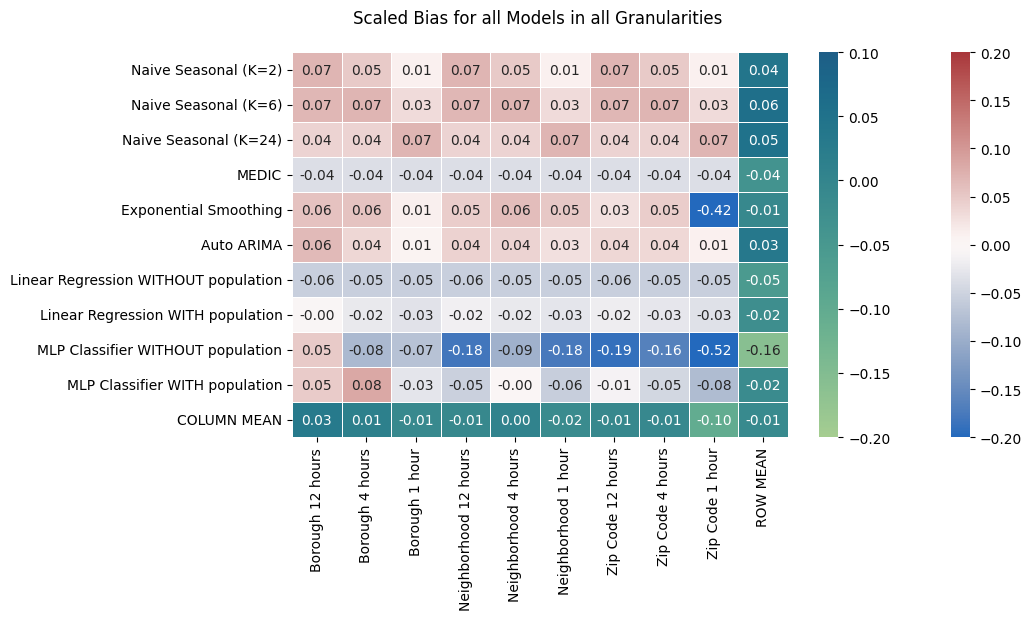

In [24]:
#df_heatmap
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(ax = ax,
                data = df_values,
                annot = True,
                fmt=".2f",
                linewidth=.5,
                cmap="vlag",
                center=0.00,
                vmin = -0.2, vmax=0.2)
ax = sns.heatmap(ax = ax,
                data = df_means,
                annot = True,
                fmt=".2f",
                linewidth=.5,
                cmap="crest",
                center=0.00,
                vmin = -0.2, vmax = 0.1)
ax.set(xlabel="", ylabel="")
ax.set_title('Scaled Bias for all Models in all Granularities \n')
plt.show()

# Figure 13

In [25]:
results_mase = results.groupby(["NH/ZIP", "Model_Name"]).apply(lambda x: (np.mean(np.abs(x["y_real"] - x["y_predict"])))/x["MASE_REF"].mean()).reset_index(name="MASE")
mase_plot = pd.pivot(results_mase, index=["NH/ZIP"], columns="Model_Name", values="MASE").transpose().reset_index()
mase_plot = pd.melt(mase_plot, id_vars="Model_Name", var_name="Aggregation", value_name="MASE").sort_values(by="Model_Name", key=lambda x: x.map(custom_sort2)).reset_index()

In [26]:
temp_plot = mase_plot[["Model_Name", "Aggregation", "MASE"]]
df_heatmap = temp_plot.pivot("Model_Name", "Aggregation", "MASE")



# statistics
df_heatmap["row_mean"] = df_heatmap.mean(axis = 1)
df_heatmap.loc["col_mean"] = df_heatmap.mean(axis = 0)

df_values = df_heatmap.copy()
df_values['row_mean'] = float('nan')
df_values.loc['col_mean'] = float('nan')

df_means = df_heatmap.copy()
df_means.loc[:-1, :-1] = float('nan')

df_values = df_values.sort_values(by=["Model_Name"], key=lambda x: x.map(custom_sort4))
df_values = df_values.reindex(columns=["df_BOROUGH_12H","df_BOROUGH_4H","df_BOROUGH_1H","df_NEIGHBORHOOD_12H","df_NEIGHBORHOOD_4H","df_NEIGHBORHOOD_1H","df_ZIPCODE_12H","df_ZIPCODE_4H","df_ZIPCODE_1H", "row_mean"])
df_means = df_means.sort_values(by=["Model_Name"], key=lambda x: x.map(custom_sort4))
df_means = df_means.reindex(columns=["df_BOROUGH_12H","df_BOROUGH_4H","df_BOROUGH_1H","df_NEIGHBORHOOD_12H","df_NEIGHBORHOOD_4H","df_NEIGHBORHOOD_1H","df_ZIPCODE_12H","df_ZIPCODE_4H","df_ZIPCODE_1H", "row_mean"])

#renaming
df_values.rename(columns={"df_BOROUGH_12H": "Borough 12 hours", 
                    "df_BOROUGH_4H": "Borough 4 hours", 
                    "df_BOROUGH_1H": "Borough 1 hour",
                    "df_NEIGHBORHOOD_12H": "Neighborhood 12 hours",
                    "df_NEIGHBORHOOD_4H": "Neighborhood 4 hours",
                    "df_NEIGHBORHOOD_1H": "Neighborhood 1 hour",
                    "df_ZIPCODE_12H": "Zip Code 12 hours",
                    "df_ZIPCODE_4H":"Zip Code 4 hours",
                    "df_ZIPCODE_1H":"Zip Code 1 hour",
                    "row_mean":"Row Mean"},
                    index={"NaiveSeasonal(K=2)":"Naive Seasonal (K=2)", 
                    "NaiveSeasonal(K=6)": "Naive Seasonal (K=6)", 
                    "NaiveSeasonal(K=24)":"Naive Seasonal (K=24)", 
                    "MEDIC": "MEDIC", 
                    "ExponentialSmoothing()":"Exponential Smoothing", 
                    "StatsForecastAutoARIMA()":"Auto ARIMA", 
                    "linear_model.LinearRegression()no_population":"Linear Regression WITHOUT population", 
                    "linear_model.LinearRegression()with_population":"Linear Regression WITH population", 
                    "MLPClassifier()no_population":"MLP Classifier WITHOUT population", 
                    "MLPClassifier()with_population":"MLP Classifier WITH population",
                    "col_mean":"Column Mean"},
                    inplace=True)
df_means.rename(columns={"df_BOROUGH_12H": "Borough 12 hours", 
                    "df_BOROUGH_4H": "Borough 4 hours", 
                    "df_BOROUGH_1H": "Borough 1 hour",
                    "df_NEIGHBORHOOD_12H": "Neighborhood 12 hours",
                    "df_NEIGHBORHOOD_4H": "Neighborhood 4 hours",
                    "df_NEIGHBORHOOD_1H": "Neighborhood 1 hour",
                    "df_ZIPCODE_12H": "Zip Code 12 hours",
                    "df_ZIPCODE_4H":"Zip Code 4 hours",
                    "df_ZIPCODE_1H":"Zip Code 1 hour",
                    "row_mean":"ROW MEAN"},
                    index={"NaiveSeasonal(K=2)":"Naive Seasonal (K=2)", 
                    "NaiveSeasonal(K=6)": "Naive Seasonal (K=6)", 
                    "NaiveSeasonal(K=24)":"Naive Seasonal (K=24)", 
                    "MEDIC": "MEDIC", 
                    "ExponentialSmoothing()":"Exponential Smoothing", 
                    "StatsForecastAutoARIMA()":"Auto ARIMA", 
                    "linear_model.LinearRegression()no_population":"Linear Regression WITHOUT population", 
                    "linear_model.LinearRegression()with_population":"Linear Regression WITH population", 
                    "MLPClassifier()no_population":"MLP Classifier WITHOUT population", 
                    "MLPClassifier()with_population":"MLP Classifier WITH population",
                    "col_mean":"COLUMN MEAN"},
                    inplace=True)



/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/394510170.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_heatmap = temp_plot.pivot("Model_Name", "Aggregation", "MASE")
/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/394510170.py:15: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df_means.loc[:-1, :-1] = float('nan')


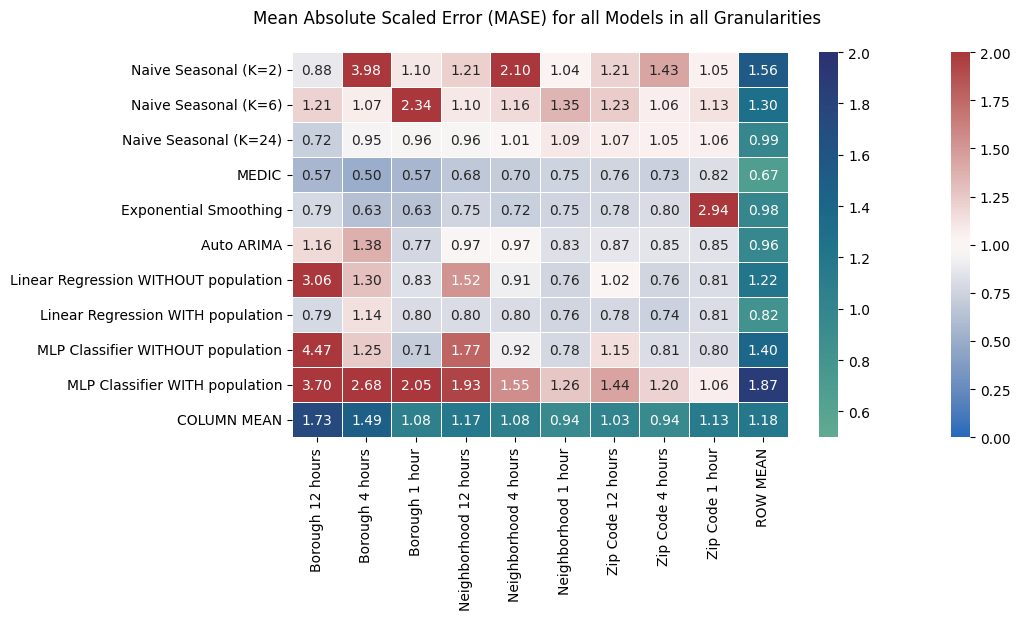

In [27]:
#df_heatmap
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(ax = ax,
                data = df_values,
                annot = True,
                fmt=".2f",
                linewidth=.5,
                cmap="vlag",
                center=1.00,
                vmin=0, vmax=2)
ax = sns.heatmap(ax = ax,
                data = df_means,
                annot = True,
                fmt=".2f",
                linewidth=.5,
                cmap="crest",
                center=1.00,
                vmin = 0.5, vmax = 2)
ax.set(xlabel="", ylabel="")
ax.set_title('Mean Absolute Scaled Error (MASE) for all Models in all Granularities \n')
plt.show()

# Figure 15

In [28]:

results_duration = results.groupby(["NH/ZIP", "Model_Name"])["Duration"].mean().reset_index(name="Duration(s)")
duration_plot = pd.pivot(results_duration, index=["NH/ZIP"], columns="Model_Name", values="Duration(s)").transpose().reset_index()
duration_plot = pd.melt(duration_plot, id_vars="Model_Name", var_name="Aggregation", value_name="Duration(s)").sort_values(by="Model_Name", key=lambda x: x.map(custom_sort2)).reset_index()

In [29]:
temp_plot = duration_plot[["Model_Name", "Aggregation", "Duration(s)"]]
df_heatmap = temp_plot.pivot("Model_Name", "Aggregation", "Duration(s)")

/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/2403025267.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_heatmap = temp_plot.pivot("Model_Name", "Aggregation", "Duration(s)")


In [30]:
# statistics
df_heatmap["row_mean"] = df_heatmap.mean(axis = 1)
df_heatmap.loc["col_mean"] = df_heatmap.mean(axis = 0)

In [31]:
df_values = df_heatmap.copy()
df_values['row_mean'] = float('nan')
df_values.loc['col_mean'] = float('nan')

df_means = df_heatmap.copy()
df_means.loc[:-1, :-1] = float('nan')

/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/2314088362.py:6: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df_means.loc[:-1, :-1] = float('nan')


In [32]:

#df_heatmap

df_values = df_values.sort_values(by=["Model_Name"], key=lambda x: x.map(custom_sort4))
df_values = df_values.reindex(columns=["df_BOROUGH_12H","df_BOROUGH_4H","df_BOROUGH_1H","df_NEIGHBORHOOD_12H","df_NEIGHBORHOOD_4H","df_NEIGHBORHOOD_1H","df_ZIPCODE_12H","df_ZIPCODE_4H","df_ZIPCODE_1H", "row_mean"])
df_means = df_means.sort_values(by=["Model_Name"], key=lambda x: x.map(custom_sort4))
df_means = df_means.reindex(columns=["df_BOROUGH_12H","df_BOROUGH_4H","df_BOROUGH_1H","df_NEIGHBORHOOD_12H","df_NEIGHBORHOOD_4H","df_NEIGHBORHOOD_1H","df_ZIPCODE_12H","df_ZIPCODE_4H","df_ZIPCODE_1H", "row_mean"])

#renaming
df_values.rename(columns={"df_BOROUGH_12H": "Borough 12 hours", 
                    "df_BOROUGH_4H": "Borough 4 hours", 
                    "df_BOROUGH_1H": "Borough 1 hour",
                    "df_NEIGHBORHOOD_12H": "Neighborhood 12 hours",
                    "df_NEIGHBORHOOD_4H": "Neighborhood 4 hours",
                    "df_NEIGHBORHOOD_1H": "Neighborhood 1 hour",
                    "df_ZIPCODE_12H": "Zip Code 12 hours",
                    "df_ZIPCODE_4H":"Zip Code 4 hours",
                    "df_ZIPCODE_1H":"Zip Code 1 hour",
                    "row_mean":"Row Mean"},
                    index={"NaiveSeasonal(K=2)":"Naive Seasonal (K=2)", 
                    "NaiveSeasonal(K=6)": "Naive Seasonal (K=6)", 
                    "NaiveSeasonal(K=24)":"Naive Seasonal (K=24)", 
                    "MEDIC": "MEDIC", 
                    "ExponentialSmoothing()":"Exponential Smoothing", 
                    "StatsForecastAutoARIMA()":"Auto ARIMA", 
                    "linear_model.LinearRegression()no_population":"Linear Regression WITHOUT population", 
                    "linear_model.LinearRegression()with_population":"Linear Regression WITH population", 
                    "MLPClassifier()no_population":"MLP Classifier WITHOUT population", 
                    "MLPClassifier()with_population":"MLP Classifier WITH population",
                    "col_mean":"Column Mean"},
                    inplace=True)
df_means.rename(columns={"df_BOROUGH_12H": "Borough 12 hours", 
                    "df_BOROUGH_4H": "Borough 4 hours", 
                    "df_BOROUGH_1H": "Borough 1 hour",
                    "df_NEIGHBORHOOD_12H": "Neighborhood 12 hours",
                    "df_NEIGHBORHOOD_4H": "Neighborhood 4 hours",
                    "df_NEIGHBORHOOD_1H": "Neighborhood 1 hour",
                    "df_ZIPCODE_12H": "Zip Code 12 hours",
                    "df_ZIPCODE_4H":"Zip Code 4 hours",
                    "df_ZIPCODE_1H":"Zip Code 1 hour",
                    "row_mean":"ROW MEAN"},
                    index={"NaiveSeasonal(K=2)":"Naive Seasonal (K=2)", 
                    "NaiveSeasonal(K=6)": "Naive Seasonal (K=6)", 
                    "NaiveSeasonal(K=24)":"Naive Seasonal (K=24)", 
                    "MEDIC": "MEDIC", 
                    "ExponentialSmoothing()":"Exponential Smoothing", 
                    "StatsForecastAutoARIMA()":"Auto ARIMA", 
                    "linear_model.LinearRegression()no_population":"Linear Regression WITHOUT population", 
                    "linear_model.LinearRegression()with_population":"Linear Regression WITH population", 
                    "MLPClassifier()no_population":"MLP Classifier WITHOUT population", 
                    "MLPClassifier()with_population":"MLP Classifier WITH population",
                    "col_mean":"COLUMN MEAN"},
                    inplace=True)

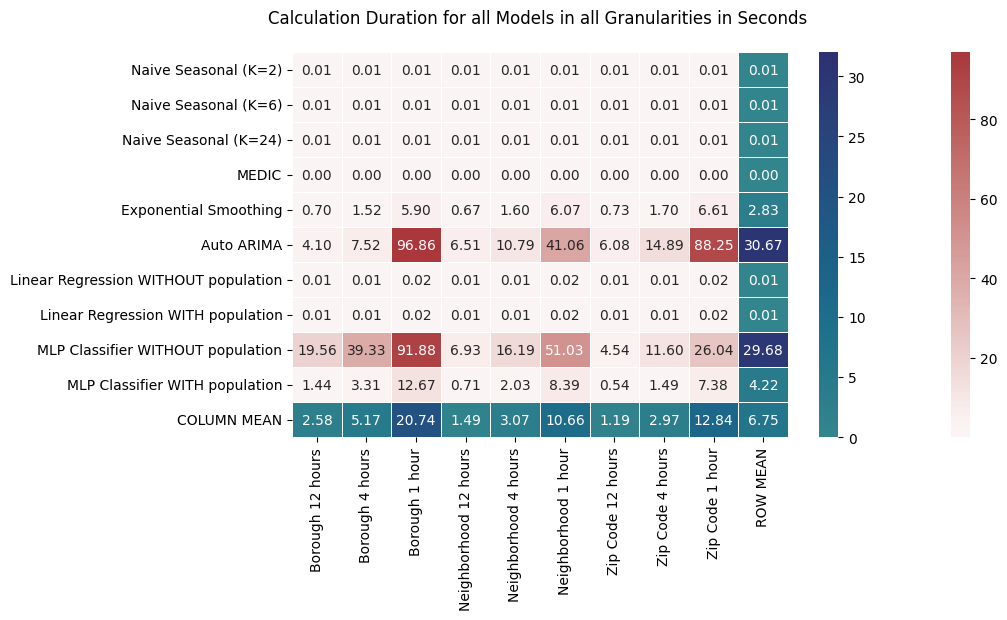

In [33]:
#df_heatmap

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(ax = ax,
                data = df_values,
                annot = True,
                fmt=".2f",
                linewidth=.5,
                cmap="vlag",
                center=0.00)
ax = sns.heatmap(ax = ax,
                data = df_means,
                annot = True,
                fmt=".2f",
                linewidth=.5,
                cmap="crest",
                center=0.00,
                vmin = 0, vmax = 32)
ax.set(xlabel="", ylabel="")
ax.set_title('Calculation Duration for all Models in all Granularities in Seconds \n')
plt.show()

# Figure 16

In [34]:
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter

In [35]:
custom_sort = {"df_BOROUGH_12H":0, "df_BOROUGH_4H":1, "df_BOROUGH_1H":2, "df_NEIGHBORHOOD_12H":3, "df_NEIGHBORHOOD_4H":4, "df_NEIGHBORHOOD_1H":5, "df_ZIPCODE_12H":6, "df_ZIPCODE_4H":7, "df_ZIPCODE_1H":8}

results_mase = results.groupby(["NH/ZIP", "Model_Name"]).apply(lambda x: (np.mean(np.abs(x["y_real"] - x["y_predict"])))/x["MASE_REF"].mean()).reset_index(name="MASE")
mase_plot = pd.pivot(results_mase, index=["NH/ZIP"], columns="Model_Name", values="MASE").transpose().reset_index()
mase_plot = pd.melt(mase_plot, id_vars="Model_Name", var_name="Aggregation", value_name="MASE").sort_values(by="Model_Name", key=lambda x: x.map(custom_sort2)).reset_index()
mase_plot = mase_plot[mase_plot["Model_Name"].str.contains("MLP|linear")]


In [36]:
mase_plot = mase_plot.assign(Population=lambda x: np.where(x['Model_Name'].str.contains('no_population'), 'no population',
                                     np.where(x['Model_Name'].str.contains('with_population'), 'with population', None)))
mase_plot['Model_Name'] = mase_plot['Model_Name'].str.replace('no_population','')
mase_plot['Model_Name'] = mase_plot['Model_Name'].str.replace('with_population','')


In [37]:
mase_plot = mase_plot.sort_values(by="Aggregation", key=lambda x: x.map(custom_sort))

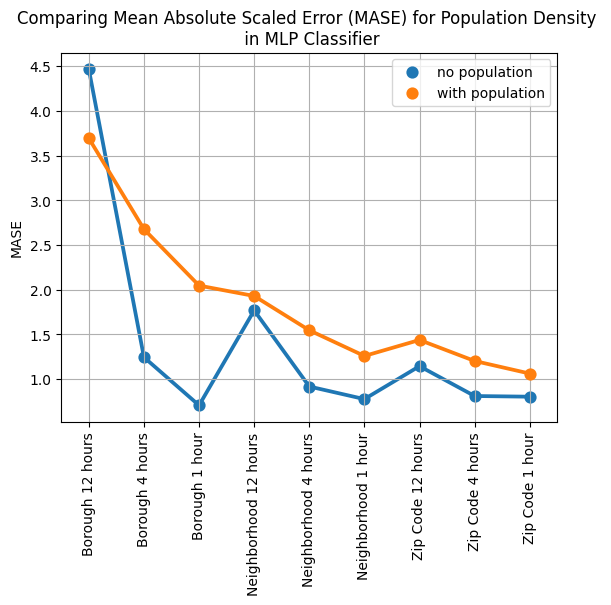

In [38]:
sns.pointplot(data=mase_plot[mase_plot["Model_Name"]=="MLPClassifier()"], x="Aggregation", y="MASE", hue="Population").set(title="Comparing Mean Absolute Scaled Error (MASE) for Population Density \n in MLP Classifier")

plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("MASE")
plt.grid() 

ax = plt.gca()
ax.set_xticklabels(["Borough 12 hours","Borough 4 hours","Borough 1 hour","Neighborhood 12 hours","Neighborhood 4 hours","Neighborhood 1 hour","Zip Code 12 hours","Zip Code 4 hours","Zip Code 1 hour"])

plt.legend(loc='upper right')

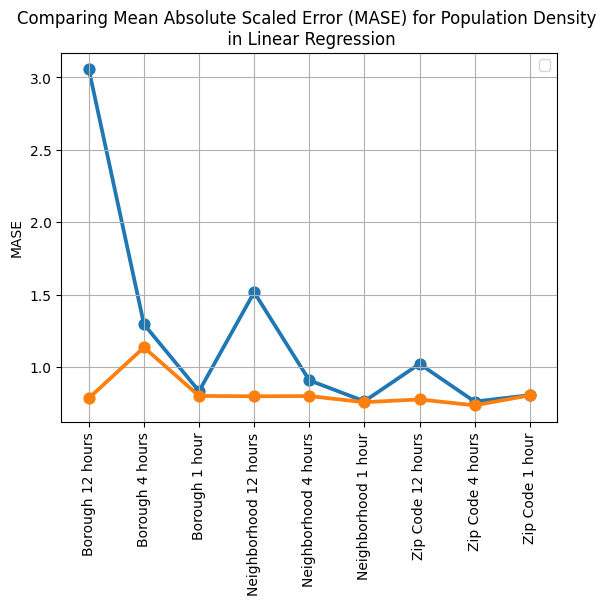

In [39]:
sns.pointplot(data=mase_plot[mase_plot["Model_Name"]=="linear_model.LinearRegression()"], x="Aggregation", y="MASE", hue="Population").set(title="Comparing Mean Absolute Scaled Error (MASE) for Population Density \n in Linear Regression")

plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("MASE")
plt.grid() 

ax = plt.gca()
ax.set_xticklabels(["Borough 12 hours","Borough 4 hours","Borough 1 hour","Neighborhood 12 hours","Neighborhood 4 hours","Neighborhood 1 hour","Zip Code 12 hours","Zip Code 4 hours","Zip Code 1 hour"])

plt.legend("")



# Figure 17

In [40]:
results_bias = results.groupby(["NH/ZIP",  "Model_Name"])["ERROR"].mean().reset_index(name="Bias")
bias_plot = pd.pivot(results_bias, index=["NH/ZIP"], columns="Model_Name", values="Bias").transpose().reset_index()
bias_plot = pd.melt(bias_plot, id_vars="Model_Name", var_name="Aggregation", value_name="Bias").sort_values(by="Model_Name", key=lambda x: x.map(custom_sort2)).reset_index()

In [41]:
bias_scale_reference = pd.DataFrame(results.groupby("NH/ZIP")["y_real"].mean()).reset_index()

In [42]:
bias_scale_table = pd.merge(bias_plot, bias_scale_reference, left_on="Aggregation", right_on="NH/ZIP")
bias_scale_table["scaled_bias"] = bias_scale_table["Bias"]/bias_scale_table["y_real"]
bias_scale_table = bias_scale_table[bias_scale_table["Model_Name"].str.contains("MLP|linear")]

In [43]:
bias_scale_table = bias_scale_table.assign(Population=lambda x: np.where(x['Model_Name'].str.contains('no_population'), 'no population',
                                     np.where(x['Model_Name'].str.contains('with_population'), 'with population', None)))
bias_scale_table['Model_Name'] = bias_scale_table['Model_Name'].str.replace('no_population','')
bias_scale_table['Model_Name'] = bias_scale_table['Model_Name'].str.replace('with_population','')


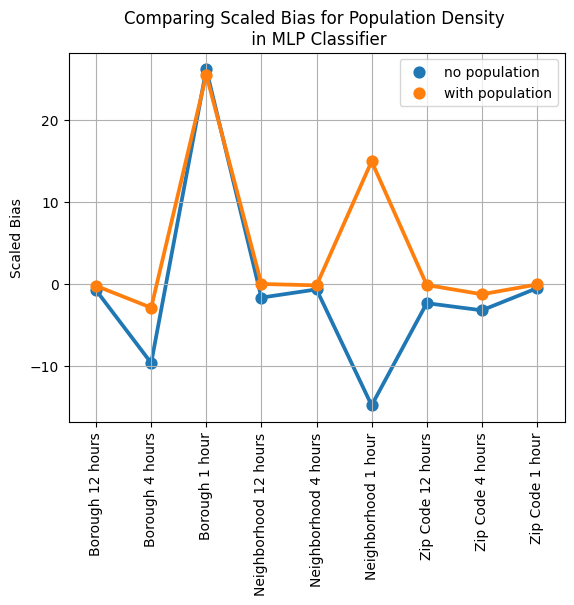

In [44]:
sns.pointplot(data=bias_scale_table[bias_scale_table["Model_Name"]=="MLPClassifier()"], x="Aggregation", y="Bias", hue="Population").set(title="Comparing Scaled Bias for Population Density \n in MLP Classifier")

plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Scaled Bias")
plt.grid() 

ax = plt.gca()
ax.set_xticklabels(["Borough 12 hours","Borough 4 hours","Borough 1 hour","Neighborhood 12 hours","Neighborhood 4 hours","Neighborhood 1 hour","Zip Code 12 hours","Zip Code 4 hours","Zip Code 1 hour"])

plt.legend(loc='upper right')

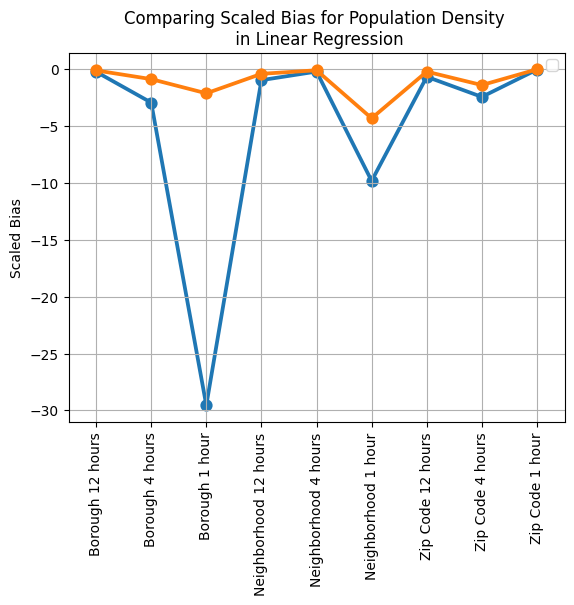

In [45]:
sns.pointplot(data=bias_scale_table[bias_scale_table["Model_Name"]=="linear_model.LinearRegression()"], x="Aggregation", y="Bias", hue="Population").set(title="Comparing Scaled Bias for Population Density \n in Linear Regression")

plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Scaled Bias")
plt.grid() 

ax = plt.gca()
ax.set_xticklabels(["Borough 12 hours","Borough 4 hours","Borough 1 hour","Neighborhood 12 hours","Neighborhood 4 hours","Neighborhood 1 hour","Zip Code 12 hours","Zip Code 4 hours","Zip Code 1 hour"])

plt.legend("")

# Figure 18

In [46]:
custom_sort = {"df_BOROUGH_12H":0, "df_BOROUGH_4H":1, "df_BOROUGH_1H":2, "df_NEIGHBORHOOD_12H":3, "df_NEIGHBORHOOD_4H":4, "df_NEIGHBORHOOD_1H":5, "df_ZIPCODE_12H":6, "df_ZIPCODE_4H":7, "df_ZIPCODE_1H":8}

results_duration = results.groupby(["NH/ZIP", "Model_Name"])["Duration"].mean().reset_index(name="Duration(s)")
duration_plot = pd.pivot(results_duration, index=["NH/ZIP"], columns="Model_Name", values="Duration(s)").transpose().reset_index()
duration_plot = pd.melt(duration_plot, id_vars="Model_Name", var_name="Aggregation", value_name="Duration(s)").sort_values(by="Model_Name", key=lambda x: x.map(custom_sort2)).reset_index()
duration_plot = duration_plot[duration_plot["Model_Name"].str.contains("MLP|linear")]

In [47]:
duration_plot = duration_plot.assign(Population=lambda x: np.where(x['Model_Name'].str.contains('no_population'), 'no population',
                                     np.where(x['Model_Name'].str.contains('with_population'), 'with population', None)))
duration_plot['Model_Name'] = duration_plot['Model_Name'].str.replace('no_population','')
duration_plot['Model_Name'] = duration_plot['Model_Name'].str.replace('with_population','')


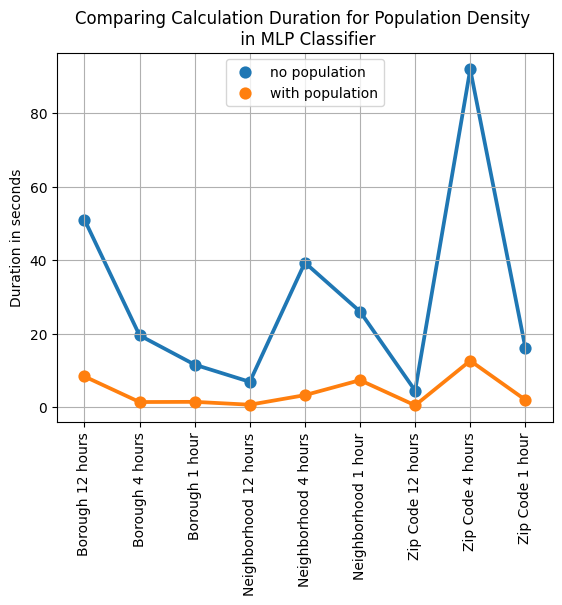

In [48]:
sns.pointplot(data=duration_plot[duration_plot["Model_Name"]=="MLPClassifier()"], x="Aggregation", y="Duration(s)", hue="Population").set(title="Comparing Calculation Duration for Population Density \n in MLP Classifier")

plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Duration in seconds")
plt.grid() 

ax = plt.gca()
ax.set_xticklabels(["Borough 12 hours","Borough 4 hours","Borough 1 hour","Neighborhood 12 hours","Neighborhood 4 hours","Neighborhood 1 hour","Zip Code 12 hours","Zip Code 4 hours","Zip Code 1 hour"])

plt.legend(loc='upper center')

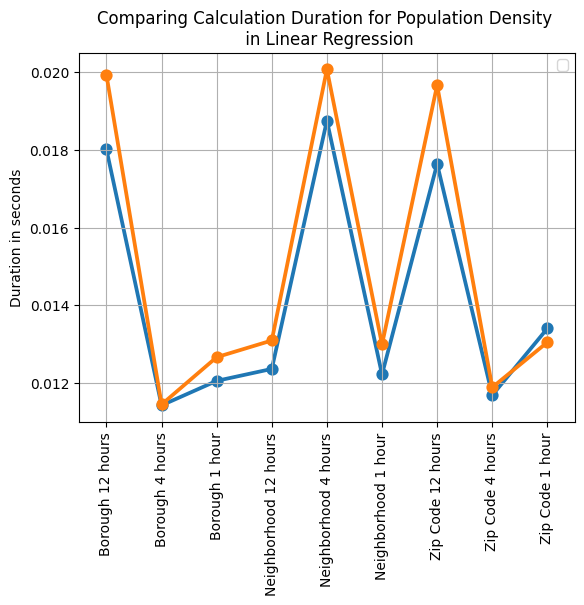

In [49]:
# plt.figure(figsize=(4, 5))

sns.pointplot(data=duration_plot[duration_plot["Model_Name"]=="linear_model.LinearRegression()"], x="Aggregation", y="Duration(s)", hue="Population").set(title="Comparing Calculation Duration for Population Density \n in Linear Regression")

plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Duration in seconds")
plt.grid() 

ax = plt.gca()
ax.set_xticklabels(["Borough 12 hours","Borough 4 hours","Borough 1 hour","Neighborhood 12 hours","Neighborhood 4 hours","Neighborhood 1 hour","Zip Code 12 hours","Zip Code 4 hours","Zip Code 1 hour"])

plt.legend("")


# Figure 12

In [50]:
custom_sort = {"df_BOROUGH_12H":0, "df_BOROUGH_4H":1, "df_BOROUGH_1H":2, "df_NEIGHBORHOOD_12H":3, "df_NEIGHBORHOOD_4H":4, "df_NEIGHBORHOOD_1H":5, "df_ZIPCODE_12H":6, "df_ZIPCODE_4H":7, "df_ZIPCODE_1H":8}
custom_sort2 = {"NaiveSeasonal(K=2)":0, "NaiveSeasonal(K=6)":1, "NaiveSeasonal(K=24)":2, "MEDIC":3, "ExponentialSmoothing()":6, "StatsForecastAutoARIMA()":7, "linear_model.LinearRegression()no_population":4, "linear_model.LinearRegression()with_population":5, "MLPClassifier()no_population":8, "MLPClassifier()with_population":9} 

#results1 = results.sort_values(by="Model_Name")
#plot_data = results.groupby(["NH/ZIP", "Model_Name"])[["y_real", "y_predict"]].agg(["mean","std"]).sort_values(by="NH/ZIP", key=lambda x: x.map(custom_sort)).reset_index()
plot_data = results.groupby(["NH/ZIP", "Model_Name"])[["y_real", "y_predict"]].agg(["mean","std"]).sort_values(by="Model_Name", key=lambda x: x.map(custom_sort2)).reset_index()
plot_data.columns  = ['_'.join(col) for col in plot_data.columns.values]

plot_data_B1 = plot_data[plot_data["NH/ZIP_"].str.contains("BOROUGH_1H")]
plot_data_B4 = plot_data[plot_data["NH/ZIP_"].str.contains("BOROUGH_4H")]
plot_data_B12 = plot_data[plot_data["NH/ZIP_"].str.contains("BOROUGH_12H")]
plot_data_N1 = plot_data[plot_data["NH/ZIP_"].str.contains("NEIGHBORHOOD_1H")]
plot_data_N4 = plot_data[plot_data["NH/ZIP_"].str.contains("NEIGHBORHOOD_4H")]
plot_data_N12 = plot_data[plot_data["NH/ZIP_"].str.contains("NEIGHBORHOOD_12H")]
plot_data_Z1 = plot_data[plot_data["NH/ZIP_"].str.contains("ZIPCODE_1H")]
plot_data_Z4 = plot_data[plot_data["NH/ZIP_"].str.contains("ZIPCODE_4H")]
plot_data_Z12 = plot_data[plot_data["NH/ZIP_"].str.contains("ZIPCODE_12H")]

1.0410206718346253 1.3046196500269773
4.164082687338501 3.7257471877458546
12.492248062015504 9.74110079672724


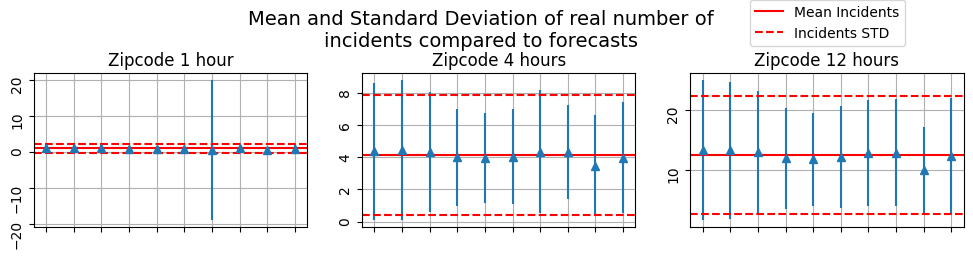

In [51]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax_list = [ax1, ax2, ax3]
plot_list = [plot_data_Z1, plot_data_Z4, plot_data_Z12]
names_list = ["Zipcode 1 hour", "Zipcode 4 hours", "Zipcode 12 hours"]
f.set_size_inches(12, 2)
f.suptitle("Mean and Standard Deviation of real number of \nincidents compared to forecasts \n", y=1.2, fontsize=14)

for axis, plot, name in zip(ax_list, plot_list, names_list):
    x = plot["Model_Name_"]
    y = plot["y_predict_mean"]
    e = plot["y_predict_std"]
    r = plot["y_real_mean"].mean()
    r_upper = r + plot["y_real_std"].mean()
    r_lower = r - plot["y_real_std"].mean()

    print(r,(r_upper-r)) # for reading of sd

    axis.errorbar(x,y,e, linestyle = "None", marker = "^")
    axis.axhline(y=r, color="red", label = "Mean Incidents")
    axis.axhline(y=r_upper, color="red", linestyle="dashed", label = "Incidents STD")
    axis.axhline(y=r_lower, color="red", linestyle="dashed")
    axis.tick_params(labelrotation=90)
    axis.title.set_text(name)
    axis.tick_params(labelbottom=False)
    axis.grid() 

handles, labels = ax1.get_legend_handles_labels()
f.legend(handles, labels, loc=(0.77,0.82))

In [52]:
labels.append("Predictions with Errorbar")

4.47638888888889 3.3380677435064117
17.90555555555556 10.919562283890173
53.716666666666676 29.04531332226768


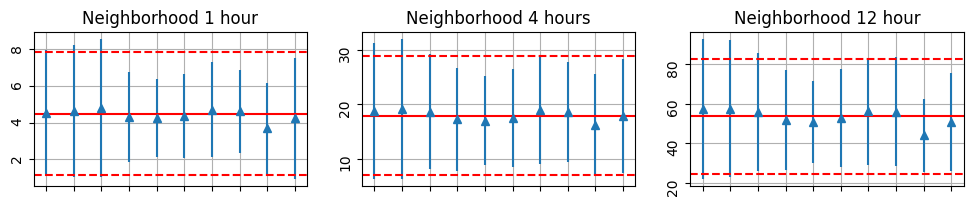

In [53]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax_list = [ax1, ax2, ax3]
plot_list = [plot_data_N1, plot_data_N4, plot_data_N12]
names_list = ["Neighborhood 1 hour", "Neighborhood 4 hours", "Neighborhood 12 hour"]
f.set_size_inches(12, 2)

for axis, plot, name in zip(ax_list, plot_list, names_list):
    x = plot["Model_Name_"]
    y = plot["y_predict_mean"]
    e = plot["y_predict_std"]
    r = plot["y_real_mean"].mean()
    r_upper = r + plot["y_real_std"].mean()
    r_lower = r - plot["y_real_std"].mean()

    print(r,(r_upper-r)) # for reading of sd

    axis.errorbar(x,y,e, linestyle = "None", marker = "^")
    axis.axhline(y=r, color="red", label = "y_real_mean")
    axis.axhline(y=r_upper, color="red", linestyle="dashed", label = "y_real_std")
    axis.axhline(y=r_lower, color="red", linestyle="dashed")
    axis.tick_params(labelrotation=90)
    axis.title.set_text(name)
    axis.tick_params(labelbottom=False)
    axis.grid()


44.76388888888889 16.52526282466031
179.05555555555557 61.738987798465615
537.1666666666667 155.36591217724254


/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/1521658755.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(["Naive Seasonal (K=2)","Naive Seasonal (K=6)","Naive Seasonal (K=24)","MEDIC","Linear Regression WITHOUT population","Linear Regression WITH population","Exponential Smoothing","Auto ARIMA","MLP Classifier WITHOUT population","MLP Classifier WITH population"])
/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/1521658755.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(["Naive Seasonal (K=2)","Naive Seasonal (K=6)","Naive Seasonal (K=24)","MEDIC","Linear Regression WITHOUT population","Linear Regression WITH population","Exponential Smoothing","Auto ARIMA","MLP Classifier WITHOUT population","MLP Classifier WITH population"])
/var/folders/n2/v_12tfqd6tg02y2ztvhw3wwc0000gn/T/ipykernel_34097/1521658755.py:23: UserWarning: FixedFormatter sho

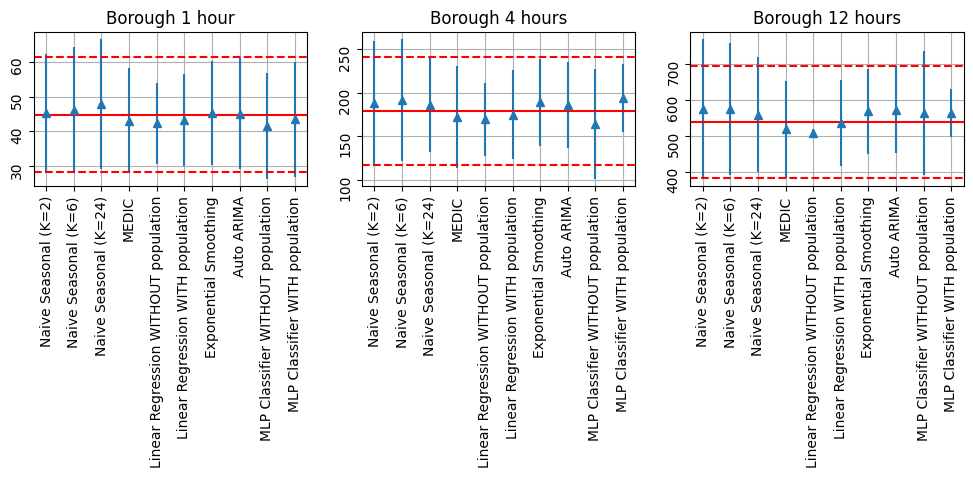

In [54]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax_list = [ax1, ax2, ax3]
plot_list = [plot_data_B1, plot_data_B4, plot_data_B12]
names_list = ["Borough 1 hour", "Borough 4 hours", "Borough 12 hours"]
f.set_size_inches(12, 2)

for axis, plot, name in zip(ax_list, plot_list, names_list):
    x = plot["Model_Name_"]
    y = plot["y_predict_mean"]
    e = plot["y_predict_std"]
    r = plot["y_real_mean"].mean()
    r_upper = r + plot["y_real_std"].mean()
    r_lower = r - plot["y_real_std"].mean()

    print(r,(r_upper-r)) # for reading of sd

    axis.errorbar(x,y,e, linestyle = "None", marker = "^")
    axis.axhline(y=r, color="red", label = "y_real_mean")
    axis.axhline(y=r_upper, color="red", linestyle="dashed", label = "y_real_std")
    axis.axhline(y=r_lower, color="red", linestyle="dashed")
    axis.tick_params(labelrotation=90)
    axis.title.set_text(name)
    axis.set_xticklabels(["Naive Seasonal (K=2)","Naive Seasonal (K=6)","Naive Seasonal (K=24)","MEDIC","Linear Regression WITHOUT population","Linear Regression WITH population","Exponential Smoothing","Auto ARIMA","MLP Classifier WITHOUT population","MLP Classifier WITH population"])
    axis.grid()
